In [7]:
from class_df import ModelPipeline

In [9]:
e = ModelPipeline('~/datasets/Covid Data.csv')

# Main info

The dataset was provided by the Mexican government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.


### Подготовка данных

Эту часть очень сложно оптимизировать, поскольку в зависимости от конкретной задачи у нас будут разные заполнения, но я добавил несколько методов в класс ModelPipeline, которыми вы можете воспользоваться

In [10]:
import numpy as np

In [11]:
e.dataset = e.dataset.replace([97,99, 98], np.nan)

In [12]:
e.dataset.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [13]:
e.dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             1048575 non-null  object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048230 non-null  float64
 8   PREGNANT              521310 non-null   float64
 9   DIABETES              1045237 non-null  float64
 10  COPD                  1045572 non-null  float64
 11  ASTHMA                1045596 non-null  float64
 12  INMSUPR               1045171 non-null  float64
 13  HIPERTENSION          1045471 non-null  float64
 14  OTHER_DISEASE         1043530 non-

In [14]:
e.get_target_distribution('CLASIFFICATION_FINAL')

,proportion
CLASIFFICATION_FINAL,
1,0.820256
2,0.176525
3,36.385285
4,0.297737
5,2.488234
6,12.219727
7,47.612236


In [15]:
e.dataset['DATE_DIED'].value_counts()

,count
DATE_DIED,
9999-99-99,971633
06/07/2020,1000
07/07/2020,996
13/07/2020,990
16/06/2020,979
...,...
01/01/2021,1
30/12/2020,1
10/01/2021,1


In [16]:
e.dataset = e.dataset.drop('DATE_DIED', axis=1)

In [17]:
e.dataset.duplicated().sum()

851149

In [18]:
e.remove_dublicates()

In [19]:
e.dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197426 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 197426 non-null  int64  
 1   MEDICAL_UNIT          197426 non-null  int64  
 2   SEX                   197426 non-null  int64  
 3   PATIENT_TYPE          197426 non-null  int64  
 4   INTUBED               96168 non-null   float64
 5   PNEUMONIA             190423 non-null  float64
 6   AGE                   197157 non-null  float64
 7   PREGNANT              92533 non-null   float64
 8   DIABETES              194638 non-null  float64
 9   COPD                  194949 non-null  float64
 10  ASTHMA                194972 non-null  float64
 11  INMSUPR               194552 non-null  float64
 12  HIPERTENSION          194858 non-null  float64
 13  OTHER_DISEASE         193138 non-null  float64
 14  CARDIOVASCULAR        194875 non-null  float64
 15  OBES

In [20]:
e.dataset[(e.dataset['PREGNANT'].isna()) & (e.dataset['SEX'] == 2)]
# мы видим, что у нас есть 102939 мужчин у которых неявно беремены они или нет
# прибегнув к здравому смыслу можно понять, что мужчина не будет беременным
# заменим этот случай на 3

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,2,1,2,1,NaN,1.0,72.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,1.0,2.0,55.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
4,2,1,2,1,NaN,2.0,68.0,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
11,2,1,2,2,2.0,2.0,24.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
12,2,1,2,2,2.0,2.0,30.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,2,13,2,1,NaN,2.0,57.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048568,1,13,2,1,NaN,2.0,47.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048571,1,13,2,2,2.0,2.0,51.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048572,2,13,2,1,NaN,2.0,55.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN


In [21]:
e.dataset.loc[e.dataset[(e.dataset['PREGNANT'].isna()) & (e.dataset['SEX'] == 2)].index, ['PREGNANT']] = 3

In [22]:
e.dataset['PREGNANT'].isna().sum()
# у нас осталось 1954 женщины, которые не знают беремены они или нет

1954

In [23]:
1954 * 100 / e.dataset.shape[0]
# потеря составит меньше одного процента, поэтому можем пожертвовать

0.9897379271220609

In [24]:
e.dataset = e.dataset.dropna(subset='PREGNANT')

In [25]:
e.misiing_data_summary()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
INTUBED,99611
PNEUMONIA,6734
AGE,268
PREGNANT,0
DIABETES,2653
COPD,2336


In [26]:
e.dataset[['CLASIFFICATION_FINAL', 'ICU']].corr(method='spearman')
# видно, что нет вообще никакой взаимосвязи между ICU и финальным результатом, поэтому удалим и эту колонку

,CLASIFFICATION_FINAL,ICU
CLASIFFICATION_FINAL,1.000000,0.050909
ICU,0.050909,1.000000


In [27]:
e.dataset[['CLASIFFICATION_FINAL', 'INTUBED']].corr(method='spearman')

,CLASIFFICATION_FINAL,INTUBED
CLASIFFICATION_FINAL,1.000000,0.126266
INTUBED,0.126266,1.000000


In [28]:
e.dataset.groupby('INTUBED')['CLASIFFICATION_FINAL'].value_counts()
# тут мы видим, что даже с тяжестью 1 человек чаще всего был неподключен к аппарату, аналогичная ситация с 2 и 3
# следовательно на основании того, что у нас есть - мы не можем сделать вывод, что подключение к аппарату как-то напрямую связано с тяжестью заболевания

INTUBED  CLASIFFICATION_FINAL
1.0      3                       12764
         7                        5496
         6                        2138
         5                         620
         2                         520
         1                         409
         4                          49
2.0      3                       31848
         7                       27121
         6                        8442
         5                        3553
         1                        1418
         2                         984
         4                         499
Name: count, dtype: int64

In [29]:
e.dataset = e.dataset.drop(['ICU','INTUBED'], axis=1)

In [30]:
e.misiing_data_summary()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
PNEUMONIA,6734
AGE,268
PREGNANT,0
DIABETES,2653
COPD,2336
ASTHMA,2314


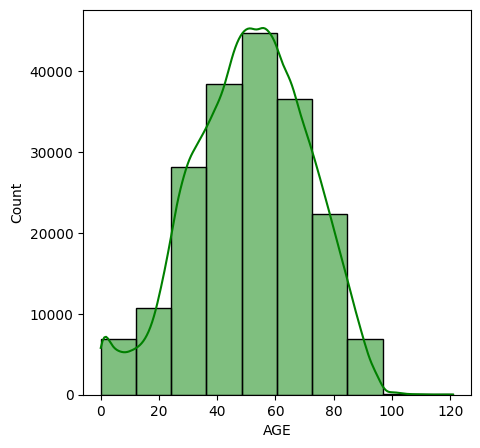

In [31]:
e.plot_numeric_distribution(column='AGE', bins=10, figsize=(5,5))

In [32]:
e.fill_missing_with_mean('AGE')
# заполним средним, поскольку у нас более менее нормальное распределение

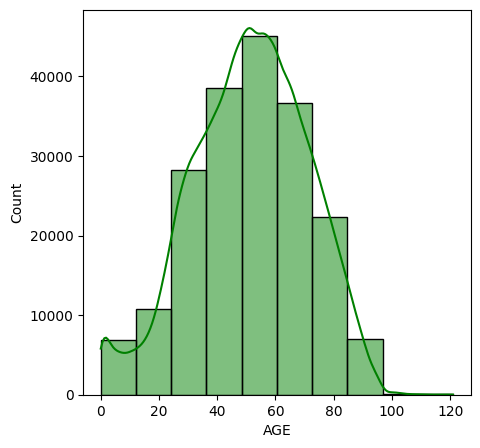

In [33]:
e.plot_numeric_distribution(column='AGE', bins=10, figsize=(5,5))

In [34]:
e.misiing_data_summary()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
PNEUMONIA,6734
AGE,0
PREGNANT,0
DIABETES,2653
COPD,2336
ASTHMA,2314


In [35]:
e.total_missing_data()

32994

In [36]:
e.dataset = e.dataset.dropna()

In [37]:
e.dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182308 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 182308 non-null  int64  
 1   MEDICAL_UNIT          182308 non-null  int64  
 2   SEX                   182308 non-null  int64  
 3   PATIENT_TYPE          182308 non-null  int64  
 4   PNEUMONIA             182308 non-null  float64
 5   AGE                   182308 non-null  float64
 6   PREGNANT              182308 non-null  float64
 7   DIABETES              182308 non-null  float64
 8   COPD                  182308 non-null  float64
 9   ASTHMA                182308 non-null  float64
 10  INMSUPR               182308 non-null  float64
 11  HIPERTENSION          182308 non-null  float64
 12  OTHER_DISEASE         182308 non-null  float64
 13  CARDIOVASCULAR        182308 non-null  float64
 14  OBESITY               182308 non-null  float64
 15  RENA

In [38]:
100 - 182308 / 197426 * 100
# итого мы потеряли 8% данных

7.657552703291358

In [39]:
e.get_target_distribution('CLASIFFICATION_FINAL')
# мы хотим свести нашу задачу к определению заболел или нет. Мы видим, что категории 4 и 2 встречаются очень редко и будут создавать нам шумы, поэтому примем за 0 - здоров, а за 1 - болен


,proportion
CLASIFFICATION_FINAL,
1,2.444764
2,0.898479
3,40.568159
4,0.867762
5,5.462733
6,14.404195
7,35.353907


In [40]:
def classify(value):
    return 1 if value in [1, 2, 3] else 0

e.dataset['CLASIFFICATION_FINAL'] = e.dataset['CLASIFFICATION_FINAL'].apply(classify)

In [41]:
e.get_target_distribution('CLASIFFICATION_FINAL')

,proportion
CLASIFFICATION_FINAL,
0,56.088597
1,43.911403


In [42]:
e.dataset.duplicated().sum()

45162

In [43]:
e.remove_dublicates()

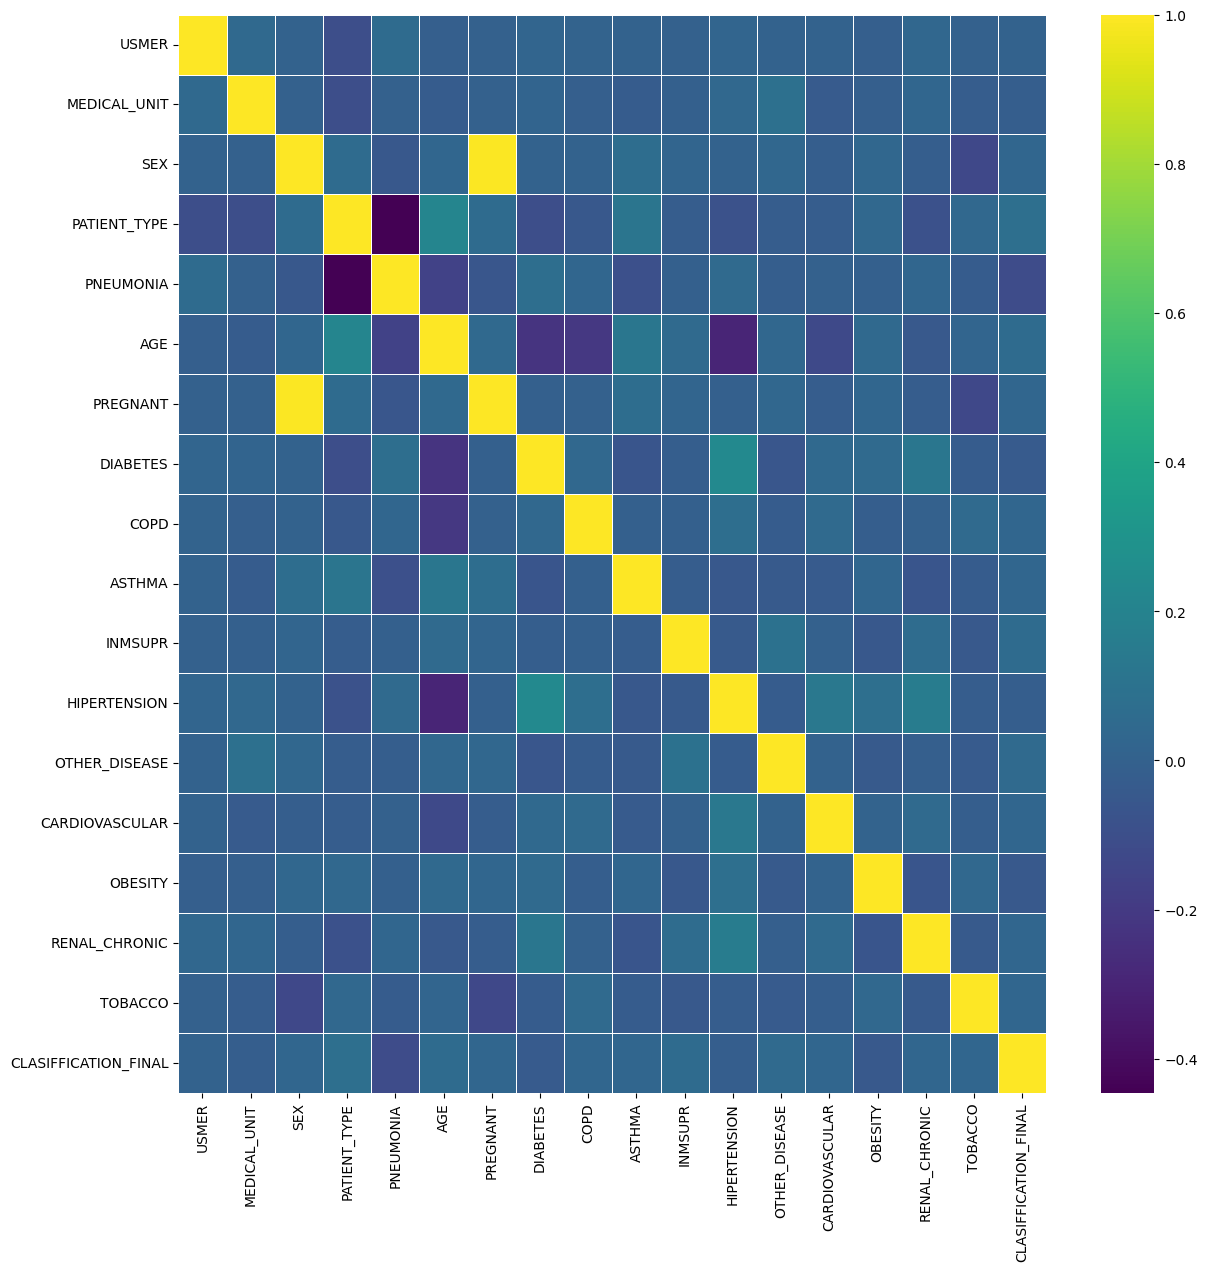

In [44]:
e.plot_correlation_matrix()

In [45]:
e.dataset = e.dataset.drop('PREGNANT', axis=1)

In [46]:
e.dataset.duplicated().sum()

1866

In [47]:
e.remove_dublicates()

In [48]:
e.smart_report_html('report.html')

#### Микроитог на сейчас



- Путем исследования данных мы удалили несколько категориальных признаков: DATE_DIED, ICU, INTUBED
- Смогли сохранить часть потерявшихся данных путем работы с признаком: pregnant
- При обработке удалили 8% данных
- Убрали шумы в target переменной

### Разбиение данных

In [49]:
e.split_train_val_test(target_col='CLASIFFICATION_FINAL')

In [50]:
e.y_test.value_counts(normalize=True) * 100

,proportion
CLASIFFICATION_FINAL,
0,52.845528
1,47.154472


In [51]:
e.y_train.value_counts(normalize=True) * 100

,proportion
CLASIFFICATION_FINAL,
0,52.836445
1,47.163555


In [52]:
e.y_val.value_counts(normalize=True) * 100

,proportion
CLASIFFICATION_FINAL,
0,52.835044
1,47.164956


#### Итог разбиения

- Мы видим, что у нас довольно хорошее распределение между 0 и 1 (ровно половина)
- У нас есть 3 сета: train, validation, test. Данное разбиение поможет нам избежать "утечки" данных

### Создание модели

In [53]:
e.fit_lgbm()

[LightGBM] [Info] Number of positive: 44662, number of negative: 50034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 94696, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471636 -> initscore=-0.113580
[LightGBM] [Info] Start training from score -0.113580


<Figure size 640x480 with 0 Axes>

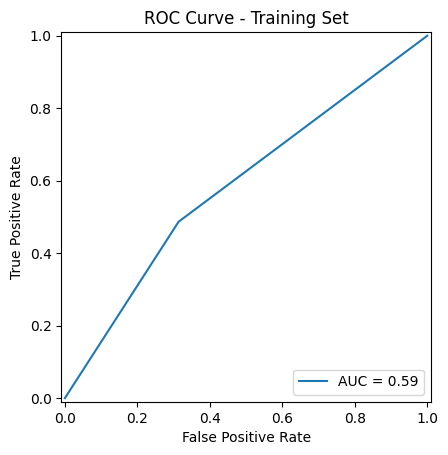

<Figure size 640x480 with 0 Axes>

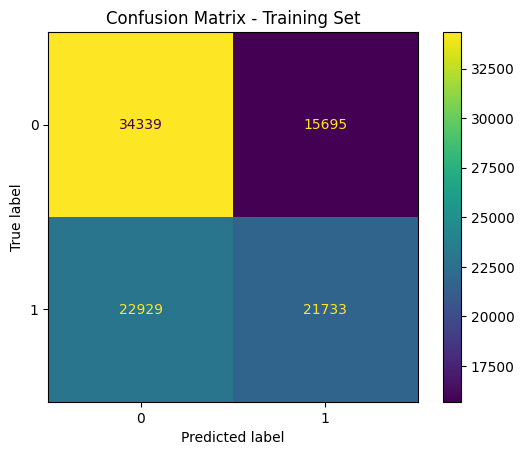

<Figure size 640x480 with 0 Axes>

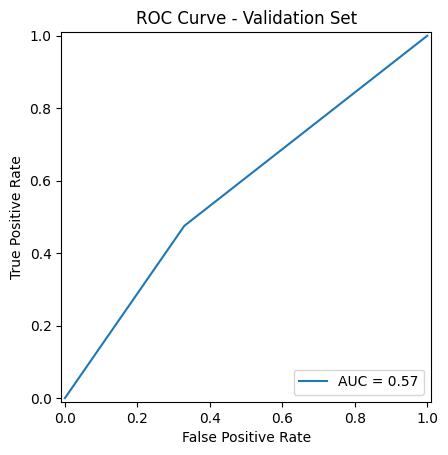

<Figure size 640x480 with 0 Axes>

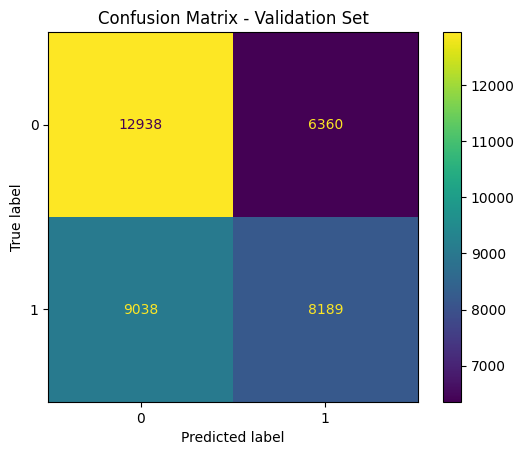

<Figure size 640x480 with 0 Axes>

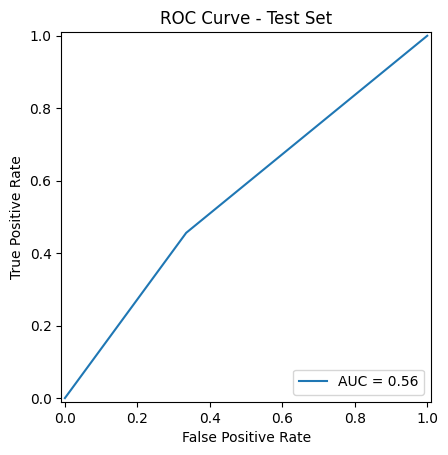

<Figure size 640x480 with 0 Axes>

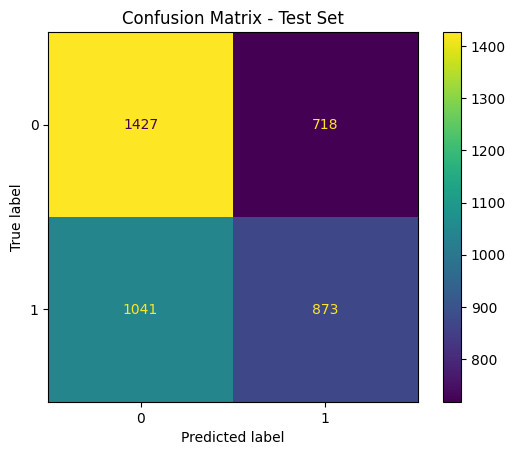

In [54]:
e.evaluate_model()

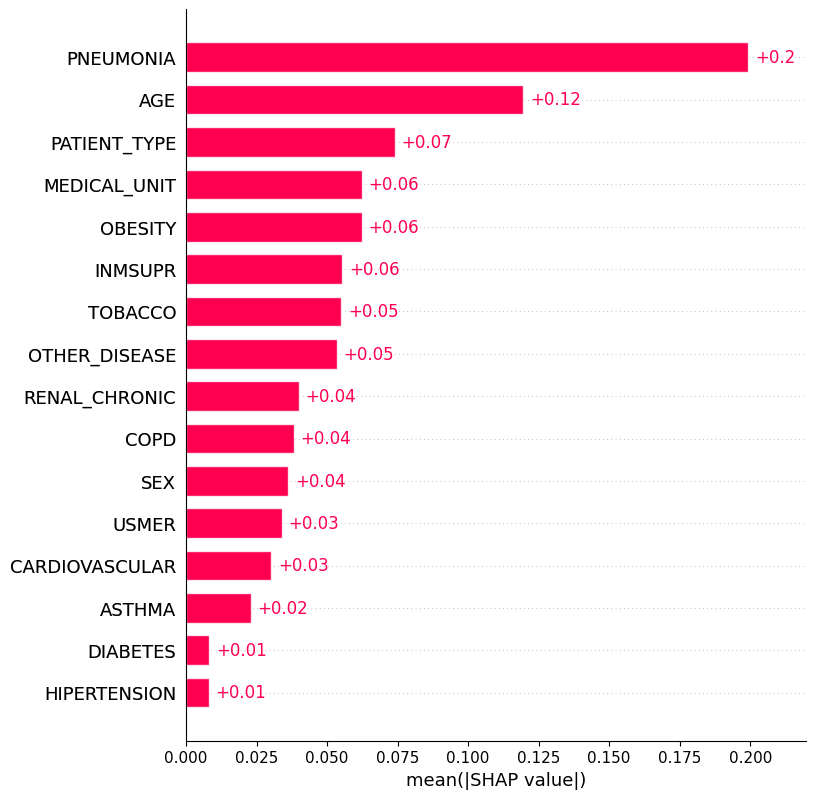

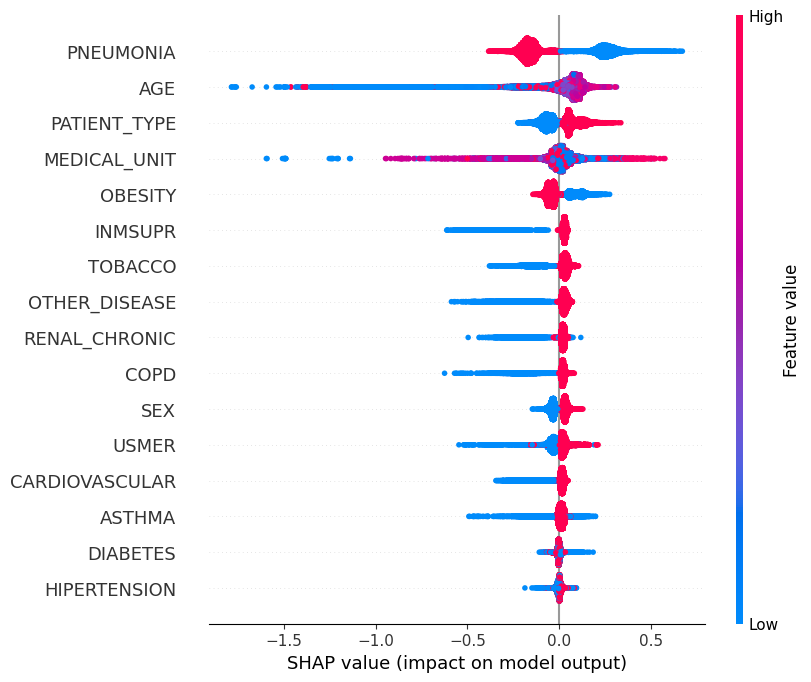

In [55]:
e.shap_analysis(max_display=20)

In [56]:
e.remove_low_shap_features(threshold=0.05)

[LightGBM] [Info] Number of positive: 35729, number of negative: 40027
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 75756, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471633 -> initscore=-0.113592
[LightGBM] [Info] Start training from score -0.113592
[LightGBM] [Info] Number of positive: 35729, number of negative: 40027
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 75756, number of used features: 7
[LightGBM] [Info] [bin

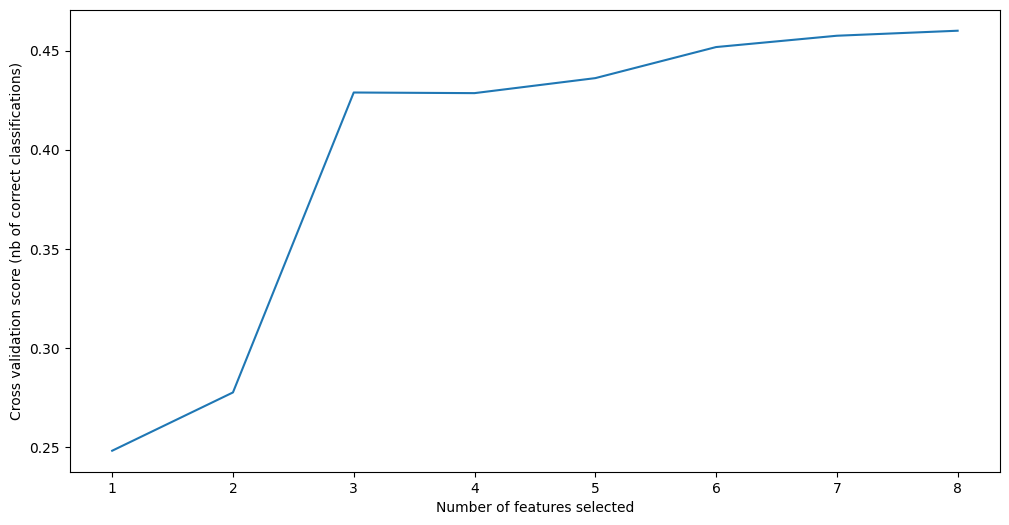

In [57]:
e.plot_feature_selection_rfecv()

In [58]:
e.remove_features_rfe(n_features_to_select=6)

[LightGBM] [Info] Number of positive: 44662, number of negative: 50034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 94696, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471636 -> initscore=-0.113580
[LightGBM] [Info] Start training from score -0.113580
[LightGBM] [Info] Number of positive: 44662, number of negative: 50034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 94696, number of used features: 7
[LightGBM] [Info] [bin

In [59]:
e.PSI()

PSI for MEDICAL_UNIT
PSI: True
PSI for PATIENT_TYPE
PSI: True
PSI for PNEUMONIA
PSI: True
PSI for AGE
PSI: True
PSI for OTHER_DISEASE
PSI: True
PSI for OBESITY
PSI: True


[LightGBM] [Info] Number of positive: 44662, number of negative: 50034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 94696, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471636 -> initscore=-0.113580
[LightGBM] [Info] Start training from score -0.113580


<Figure size 640x480 with 0 Axes>

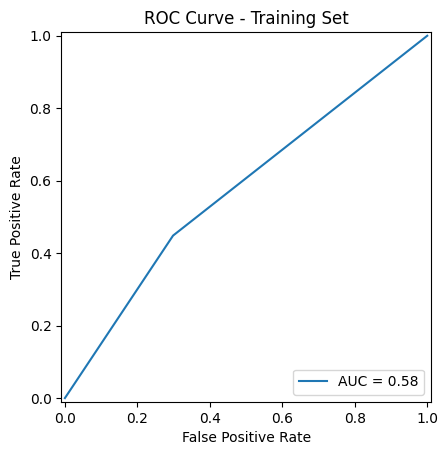

<Figure size 640x480 with 0 Axes>

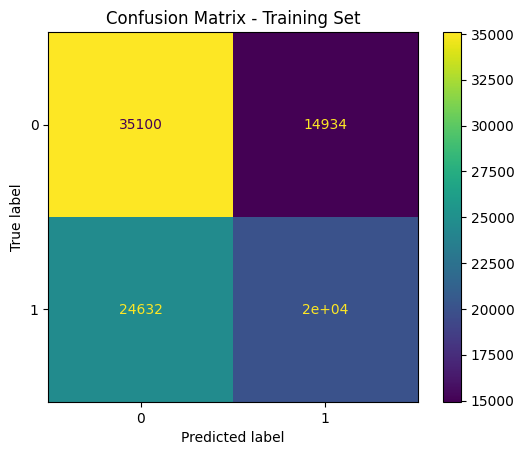

<Figure size 640x480 with 0 Axes>

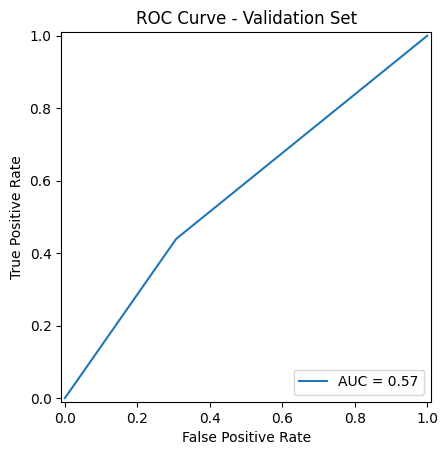

<Figure size 640x480 with 0 Axes>

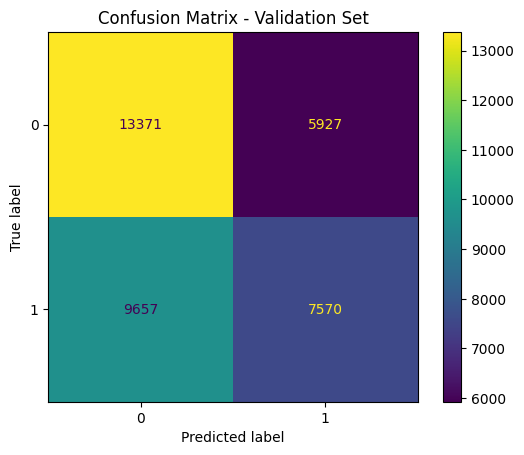

<Figure size 640x480 with 0 Axes>

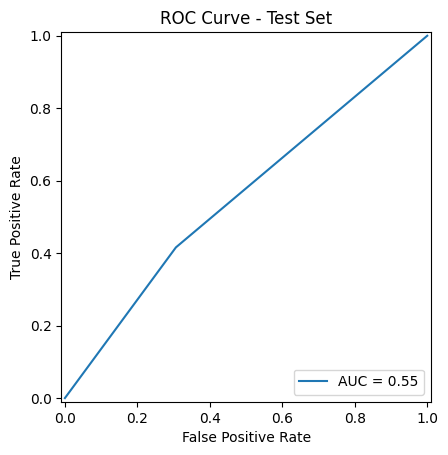

<Figure size 640x480 with 0 Axes>

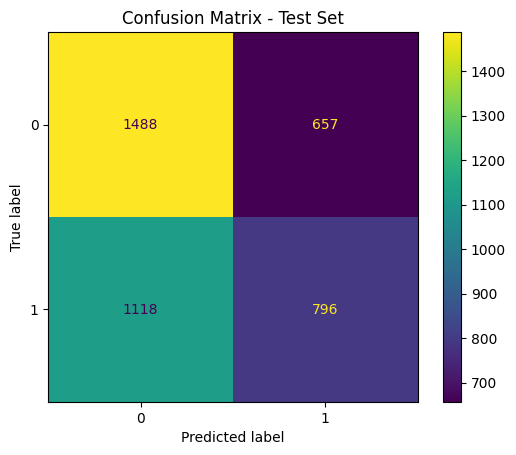

In [60]:
e.fit_lgbm()
e.evaluate_model()

### Подбор гиперпараметров

- depth - глубина
- num_leaves - кол-во листьев
- num_iterations - кол-во деревьев
- min_child_samples - минимальное кол-во образцов в дочерних узлах
- n_estimators - тоже кол-во деревьев

In [61]:
param_grid = {
            'max_depth' : np.arange(1, 8,2),
            'n_estimators': np.arange(5, 100, 20),
            'num_leaves': np.arange(2, 100, 15),
            'learning_rate': np.linspace(0.001, 0.99, num=5),
            'min_data_in_leaf': np.arange(200, 1000, 200)
        }

e.grid_fit(param_grid)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600


<Figure size 640x480 with 0 Axes>

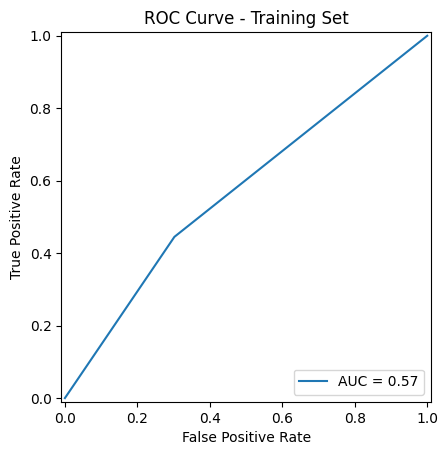

<Figure size 640x480 with 0 Axes>

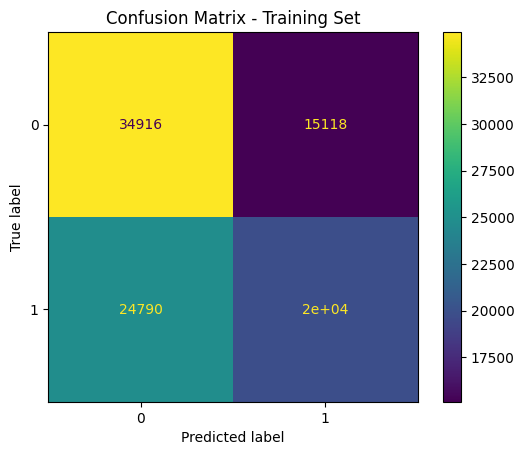

[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600


<Figure size 640x480 with 0 Axes>

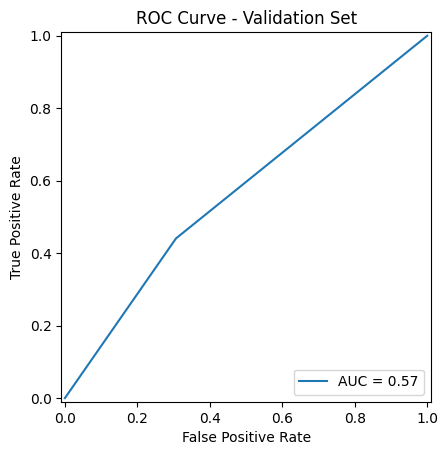

<Figure size 640x480 with 0 Axes>

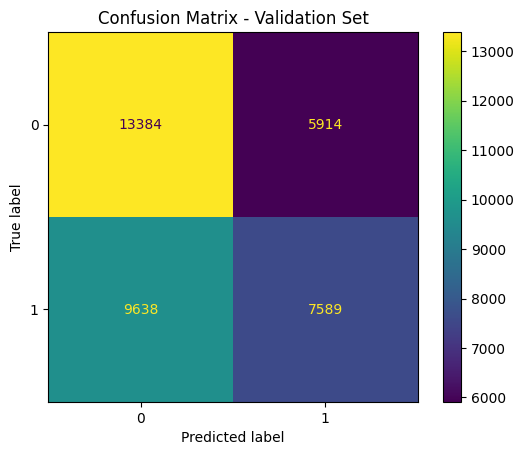

[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600


<Figure size 640x480 with 0 Axes>

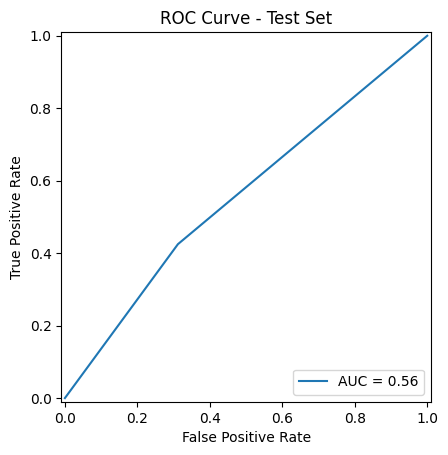

<Figure size 640x480 with 0 Axes>

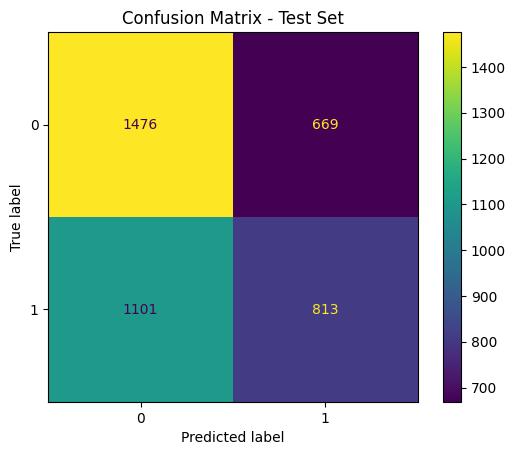

In [62]:
e.evaluate_grid_search_model()

In [63]:
e.grid_model.best_params_

{'learning_rate': 0.74275,
 'max_depth': 7,
 'min_data_in_leaf': 600,
 'n_estimators': 5,
 'num_leaves': 62}

In [64]:
e.save_grid_model_pickle()